In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

from collections import defaultdict

import plotly.graph_objects as go
from plotly import express as px

import sys
sys.path.append('../src/sankey/')

from utils2 import *

# PREPARATION

In [1259]:
INN_FEATURES = ['region', 'activity_field']
VEHICLE_FEATURES = ['vin', 'brand', 'chassis_config', 'year', 'body_type', 'model', 'age']
TRANSACTION_FEATURES = ['operation_date', 'operation_reason', 'operation_year']

############################################################################################

INN_INFO_PATH = '../data/processed/inn_info.parquet'

%time df = pd.read_parquet('../data/processed/gibdd.parquet')
df = df.drop('region', axis=1).rename({'Наименование':'region'}, axis=1)
df.loc[df['inn'].isna(), 'inn'] = df.loc[df['inn'].isna(), 'activity_field'] #replace nan with "физлицо"

inn_info = pd.read_parquet(INN_INFO_PATH)

# Добавляем upper_activity из ОКВЭД до первой точки
df_okved = pd.read_csv('/home/jovyan/remote_shared_data/dsdiag222/gibdd_dataset_raw/okved.csv', delimiter=';', error_bad_lines=False, warn_bad_lines=False)
okved_dict = df_okved.loc[df_okved['Code'].str.split('.').str.len() == 1 & df_okved['Code'].apply(lambda x: 'РАЗДЕЛ' not in x)].set_index('Code').to_dict()['Name']
okved_dict = defaultdict(str, okved_dict)
inn_info.loc[~inn_info['activity_code'].isna(), 'upper_activity'] = inn_info.loc[~inn_info['activity_code'].isna(), 'activity_code'].apply(lambda x: okved_dict[x.split('.')[0]])

del okved_dict, df_okved

%time transaction_data = prepare_date(df, inn_info, INN_FEATURES, VEHICLE_FEATURES, TRANSACTION_FEATURES)

CPU times: user 7.62 s, sys: 6.76 s, total: 14.4 s
Wall time: 8.68 s


b'Skipping line 75: expected 2 fields, saw 3\nSkipping line 211: expected 2 fields, saw 3\nSkipping line 218: expected 2 fields, saw 4\nSkipping line 232: expected 2 fields, saw 3\nSkipping line 251: expected 2 fields, saw 3\nSkipping line 266: expected 2 fields, saw 3\nSkipping line 310: expected 2 fields, saw 3\nSkipping line 321: expected 2 fields, saw 3\nSkipping line 391: expected 2 fields, saw 3\nSkipping line 440: expected 2 fields, saw 3\nSkipping line 444: expected 2 fields, saw 4\nSkipping line 447: expected 2 fields, saw 3\nSkipping line 473: expected 2 fields, saw 4\nSkipping line 498: expected 2 fields, saw 3\nSkipping line 573: expected 2 fields, saw 3\nSkipping line 630: expected 2 fields, saw 3\nSkipping line 695: expected 2 fields, saw 3\nSkipping line 740: expected 2 fields, saw 3\nSkipping line 765: expected 2 fields, saw 3\nSkipping line 826: expected 2 fields, saw 3\nSkipping line 870: expected 2 fields, saw 3\nSkipping line 873: expected 2 fields, saw 3\nSkipping 

In [1260]:
df_gibdd_test = pd.read_parquet('../data/processed/gibdd.parquet')

In [ ]:
XTC549005H2485982

In [1360]:
df_gibdd_test[df_gibdd_test['vin'] == 'XTC549005H2485982']

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,body_type,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-12,1140,С,NaT,КАМАЗ,5490,HDT2,О,4x2,2017.0,XTC549005H2485982,11,1,None,NaN,7900.0,8603133887,None,НИЖНЕВАРТОВСК Г..,Тягач седельный,Строительная,Санкт-Петербург,Северо-Западный ФО,Северо-Западный ФО,первичная регистрация


In [1383]:
df_gibdd_test[df_gibdd_test['vin'] == 'XTC549005G2477371']

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,body_type,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-03,1192,С,NaT,КАМАЗ,5490,HDT2,О,4x2,2016.0,XTC549005G2477371,11,1,None,NaN,7900.0,1650276008,None,НАБЕРЕЖНЫЕ ЧЕЛНЫ Г.,Тягач седельный,Прочие,Татарстан,Приволжский ФО,Приволжский ФО,первичная регистрация
2019-02-28,1192,С,2019-02-28,КАМАЗ,5490,HDT2,О,4x2,2016.0,XTC549005G2477371,94,1,4,NaN,7900.0,1648038937,ЗЕЛЕНОДОЛЬСКИЙ Р-Н.,Г ЗЕЛЕНОДОЛЬСК,Тягач седельный,Коммерческие перевозки,Татарстан,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."
2020-02-26,1192,С,2020-02-26,КАМАЗ,5490,HDT2,О,4x2,2016.0,XTC549005G2477371,94,1,4.0,NaN,7900.0,1648038937,ЗЕЛЕНОДОЛЬСКИЙ Р-Н.,Г ЗЕЛЕНОДОЛЬСК,Тягач седельный,None,Татарстан,Приволжский ФО,Приволжский ФО,"Изменение собственника по сделкам, произведенн..."


In [1387]:
df_gibdd_test.sample(5)

,coato,vehicle_type,registration_date,brand,model,class,origin,chassis_config,year,vin,primary,affiliation,code,mass_max,mass_idle,inn,region,city,body_type,activity_field,Наименование,Федеральный округ до 2011,Федеральный округ,operation_reason
operation_date,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-18,1118,С,2017-10-18,МАЗ,533605,HDT2,И,4x2,2005.0,Y3M53360550000514,94,2,1,NaN,8800.0,None,None,П ЗАГОРЯНСКИЙ,Бортовой,ФИЗ ЛИЦО,Волгоградская область,Южный ФО,Южный ФО,"Изменение собственника по сделкам, произведенн..."
2013-08-02,1125,С,2013-08-02,КАМАЗ,43118,HDT2,О,6x6,2005.0,X1F66062W50000040,12,1,51,NaN,10685.0,3818028080,УСТЬ-КУТСКИЙ,УСТЬ-КУТ,Автотопливозаправщик,None,Иркутская область,Сибирский ФО,Сибирский ФО,"регистрация, снятых с учета"
2018-04-27,1103,С,2018-04-27,КАМАЗ,6522,HDT3,О,6x4,2011.0,XTC652200B1202433,94,1,5,NaN,13950.0,7709621829,РАМЕНСКИЙ Р-Н.,С БЫКОВО,Самосвал,Строительная,Краснодарский край,Южный ФО,Южный ФО,"Изменение собственника по сделкам, произведенн..."
2013-11-07,1145,С,2001-01-01,SCANIA,R440LA,HDT3,И,4x2,2013.0,YS2R4X20005335517,11,1,4,NaN,8246.0,7805144375,ОЧАКОВО-МАТВЕЕВСКОЕ (ЗАО) Р-Н,None,Тягач седельный,Коммерческие перевозки,Москва,Центральный ФО,Центральный ФО,первичная регистрация
2015-12-29,1146,С,2001-01-01,SCANIA,R440CA,HDT3,И,6x4,2015.0,YS2R6X40002120618,11,1,4,NaN,9759.0,7729657870,ПРОСПЕКТ ВЕРНАДСКОГО (ЗАО) Р-Н,None,Тягач седельный,Нефтегазодобывающая,Московская область,Центральный ФО,Центральный ФО,первичная регистрация


In [1353]:
df_gibdd_test[(df_gibdd_test['inn'] == '7302020969') & (df_gibdd_test['brand'] == 'SCANIA')]['year'].mean()

2013.0

In [1354]:
df_gibdd_test[(df_gibdd_test['inn'] == '7302020969') & (df_gibdd_test['brand'] == 'КАМАЗ')]['model'].value_counts()

5490      43
54115     11
53215      8
53202      7
53212      5
5460       5
53212А     5
65206      4
5320       3
53504      3
55111      2
43253      2
65117      1
53212С     1
Name: model, dtype: int64

# QUERY SELLER BUYER VEHICLE TRANSACTION

In [1263]:
SelectMultipleInteract(transaction_data, ['region_seller', 'activity_field_seller', 'brand', 'model', 'chassis_config'])

SelectMultipleInteract(children=(SelectMultiple(description='region_seller', options=(nan, 'Воронежская област…

### Атрибуты продавцов/покупателей (Группировка по этим атрибутам):
    - 'inn'
    - 'name'
    - 'group' - Холдинг
    - 'region'
    - 'acitivity_field' - Вид деятельности из ГИБДД
    - 'activity_code' - ОКВЭД из СПАРК
    - 'activity' - Вид деятельности из СПАРК
    - 'upper_activity' - ОКВЭД до первой точки в коде
    - 'status'
    - 'risk'
    - 'size'

### Атрибуты авто:
    - 'vin'
    - 'brand'
    - 'chassis_config'
    - 'year'
    - 'body_type'
    - 'model'
    - 'age'

### Атрибуты транзакций:
    - 'operation_date'
    - 'operation_reason'
    - 'operation_year'

In [1264]:
inn_info[inn_info['name'] == 'ООО "ГАЗПРОМ ТРАНСГАЗ КАЗАНЬ"']

,size,name,activity,status,activity_code,risk,group,upper_activity
inn,,,,,,,,
1600000036,Крупные предприятия,"ООО ""ГАЗПРОМ ТРАНСГАЗ КАЗАНЬ""",Транспортирование по трубопроводам газа,Действующая,49.50.21,Низкий риск,"ГАЗПРОМ, ПАО",Деятельность сухопутного и трубопроводного тра...


In [1388]:
seller_select = {
  'region_seller':['Татарстан'],
    #'activity_field_seller': ['Лизинговая компания'],
   #  'region_seller':['Татарстан'],
   #'inn_seller':['1600000036']
   # "size_seller":['Средние предприятия'],
}

buyer_select = {
   #  'inn_buyer': ['1600000036'],#5032099538
    'region_buyer':['Татарстан'],
  #'activity_field_buyer': ['Лизинговая компания'],
   # 'upper_activity_buyer' : ['Деятельность сухопутного и трубопроводного транспорта'],
   # 'size_seller': ['Крупные предприятия'],
}

vehicle_select = {
  'brand': ['КАМАЗ'],
  #  'model': ['5350'],
#    'chassis_config': ['6x4'],
    #'year' : [2018]
}

transaction_select = {    
   # 'operation_year':[2019]
}

seller_group = 'name_seller'
buyer_group = 'name_buyer'

In [1389]:
tmp = dataframe_select(
    transaction_data, 
        [
            seller_select,
            buyer_select,
            vehicle_select,
            transaction_select
        ])
display(tmp)
print(tmp.shape)

,inn_seller,inn_buyer,region_seller,activity_field_seller,region_buyer,activity_field_buyer,vin,brand,chassis_config,year,body_type,model,operation_date,operation_reason,operation_year,size_seller,name_seller,activity_seller,status_seller,activity_code_seller,risk_seller,group_seller,upper_activity_seller,size_buyer,name_buyer,activity_buyer,status_buyer,activity_code_buyer,risk_buyer,group_buyer,upper_activity_buyer
0,1650241446,1660170434,Татарстан,None,Татарстан,Сельское хозяйство,X89594341D0DM6018,КАМАЗ,6x4,2013.0,Цистерна,65115,2013-03-14,"регистрация, снятых с учета",2013,NaN,1650241446,NaN,NaN,NaN,NaN,1650241446,NaN,NaN,1660170434,NaN,NaN,NaN,NaN,1660170434,NaN
1,1650241446,1655232702,Татарстан,None,Татарстан,None,X89594341D0DM6059,КАМАЗ,6x4,2013.0,Грузовые прочие,53215,2013-03-18,"регистрация, снятых с учета",2013,NaN,1650241446,NaN,NaN,NaN,NaN,1650241446,NaN,NaN,1655232702,NaN,NaN,NaN,NaN,1655232702,NaN
2,1648018296,1620001013,Татарстан,Сельское хозяйство,Татарстан,Сельское хозяйство,X9H47415EA0000044,КАМАЗ,4x2,2010.0,Фургон,4308,2013-03-27,"Изменение собственника по сделкам, произведенн...",2013,NaN,1648018296,NaN,NaN,NaN,NaN,1648018296,NaN,NaN,1620001013,NaN,NaN,NaN,NaN,1620001013,NaN
3,1648018296,1620001013,Татарстан,Сельское хозяйство,Татарстан,Сельское хозяйство,X9H47415NA0000068,КАМАЗ,6x4,2010.0,Изотермический фургон,65115,2013-03-27,"Изменение собственника по сделкам, произведенн...",2013,NaN,1648018296,NaN,NaN,NaN,NaN,1648018296,NaN,NaN,1620001013,NaN,NaN,NaN,NaN,1620001013,NaN
4,1648018296,1620001013,Татарстан,Сельское хозяйство,Татарстан,Сельское хозяйство,X9H47415EA0000048,КАМАЗ,4x2,2010.0,Фургон,4308,2013-03-27,"Изменение собственника по сделкам, произведенн...",2013,NaN,1648018296,NaN,NaN,NaN,NaN,1648018296,NaN,NaN,1620001013,NaN,NaN,NaN,NaN,1620001013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,1650081520,1643007526,Татарстан,Коммерческие перевозки,Татарстан,None,X8978920KH0FG2015,КАМАЗ,6x6,2017.0,Агрегат для депарафинизации скважин,43118,2020-03-27,"Изменение собственника по сделкам, произведенн...",2020,Крупные предприятия,"ОАО ""РИАТ""",Производство грузовых автомобилей,Действующая,29.10.4,Низкий риск,"ОАО ""РИАТ""","Производство автотранспортных средств, прицепо...",Микропредприятия,"ООО ""КОЙЛ-СЕРВИС""",Ремонт машин и оборудования,Действующая,33.12,Низкий риск,"ООО ""КОЙЛ-СЕРВИС""",Ремонт и монтаж машин и оборудования
4567,ФИЗ ЛИЦО,1644087637,Татарстан,ФИЗ ЛИЦО,Татарстан,None,X89F46A05F0AA3002,КАМАЗ,4x2,2015.0,Спец,53605,2020-03-27,"Изменение собственника по сделкам, произведенн...",2020,NaN,ФИЗ ЛИЦО,NaN,NaN,NaN,NaN,ФИЗ ЛИЦО,NaN,Микропредприятия,"ООО ""ЭКОСПЕЦТРАНС""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""ЭКОСПЕЦТРАНС""",Деятельность сухопутного и трубопроводного тра...
4568,ФИЗ ЛИЦО,1644087637,Татарстан,ФИЗ ЛИЦО,Татарстан,None,X89F46A05F0AA3001,КАМАЗ,4x2,2015.0,Спец,53605,2020-03-27,"Изменение собственника по сделкам, произведенн...",2020,NaN,ФИЗ ЛИЦО,NaN,NaN,NaN,NaN,ФИЗ ЛИЦО,NaN,Микропредприятия,"ООО ""ЭКОСПЕЦТРАНС""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""ЭКОСПЕЦТРАНС""",Деятельность сухопутного и трубопроводного тра...
4569,8904035523,6315602320,Татарстан,Строительная,Татарстан,None,XTC652200A1191001,КАМАЗ,6x6,2010.0,Самосвал,6522,2020-03-28,"регистрация, снятых с учета",2020,Крупные предприятия,"ООО ""РОСДОРСТРОЙ"",ООО ""РДС""",Производство земляных работ,Действующая,43.12.3,Низкий риск,"ООО ""РОСДОРСТРОЙ"",ООО ""РДС""",Работы строительные специализированные,Средние предприятия,"ООО""ЭКСПЕРТ""",Ремонт электрического оборудования,Действующая,33.14,Низкий риск,"ООО""ЭКСПЕРТ""",Ремонт и монтаж машин и оборудования


(4571, 31)


In [1382]:
tmp[tmp['inn_buyer'] == '1650374397']

,inn_seller,inn_buyer,region_seller,activity_field_seller,region_buyer,activity_field_buyer,vin,brand,chassis_config,year,body_type,model,operation_date,operation_reason,operation_year,size_seller,name_seller,activity_seller,status_seller,activity_code_seller,risk_seller,group_seller,upper_activity_seller,size_buyer,name_buyer,activity_buyer,status_buyer,activity_code_buyer,risk_buyer,group_buyer,upper_activity_buyer
1368680,1650327358,1650374397,Татарстан,Коммерческие перевозки,Татарстан,Коммерческие перевозки,X9H47415EG9000167,КАМАЗ,4x2,2016.0,Фургон,4308,2019-02-12,"Изменение собственника по сделкам, произведенн...",2019,Микропредприятия,"ООО ""СПЕЦАВТО-М""","Торговля оптовая автомобильными деталями, узла...",Действующая,45.31.1,Низкий риск,"ООО ""СПЕЦАВТО-М""",Торговля оптовая и розничная автотранспортными...,Микропредприятия,"ООО ""СПЕЦТРАНСАВТО""",Деятельность автомобильного грузового транспорта,Действующая,49.41,Средний риск,"ООО ""СПЕЦТРАНСАВТО""",Деятельность сухопутного и трубопроводного тра...
1390823,ФИЗ ЛИЦО,1650374397,Московская область,ФИЗ ЛИЦО,Московская область,Коммерческие перевозки,X9H476700DC000030,HINO,4x2,2013.0,Фургон,500,2019-03-15,"Изменение собственника по сделкам, произведенн...",2019,NaN,ФИЗ ЛИЦО,NaN,NaN,NaN,NaN,ФИЗ ЛИЦО,NaN,Микропредприятия,"ООО ""СПЕЦТРАНСАВТО""",Деятельность автомобильного грузового транспорта,Действующая,49.41,Средний риск,"ООО ""СПЕЦТРАНСАВТО""",Деятельность сухопутного и трубопроводного тра...
1591302,1650327358,1650374397,Татарстан,Коммерческие перевозки,Татарстан,None,X9H47415EG9000147,КАМАЗ,4x2,2016.0,Фургон,4308,2019-12-27,"Изменение собственника по сделкам, произведенн...",2019,Микропредприятия,"ООО ""СПЕЦАВТО-М""","Торговля оптовая автомобильными деталями, узла...",Действующая,45.31.1,Низкий риск,"ООО ""СПЕЦАВТО-М""",Торговля оптовая и розничная автотранспортными...,Микропредприятия,"ООО ""СПЕЦТРАНСАВТО""",Деятельность автомобильного грузового транспорта,Действующая,49.41,Средний риск,"ООО ""СПЕЦТРАНСАВТО""",Деятельность сухопутного и трубопроводного тра...


In [1386]:
tmp[tmp['inn_buyer'] == '1650276008']

,inn_seller,inn_buyer,region_seller,activity_field_seller,region_buyer,activity_field_buyer,vin,brand,chassis_config,year,body_type,model,operation_date,operation_reason,operation_year,size_seller,name_seller,activity_seller,status_seller,activity_code_seller,risk_seller,group_seller,upper_activity_seller,size_buyer,name_buyer,activity_buyer,status_buyer,activity_code_buyer,risk_buyer,group_buyer,upper_activity_buyer
952049,INITIAL,1650276008,NaN,NaN,Татарстан,Прочие,XTC549005G2477371,КАМАЗ,4x2,2016.0,Тягач седельный,5490,2017-08-03,первичная регистрация,2017,NaN,INITIAL,NaN,NaN,NaN,NaN,INITIAL,NaN,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...
983246,INITIAL,1650276008,NaN,NaN,Татарстан,Прочие,XTC652065H2495434,КАМАЗ,6x4,2017.0,Тягач седельный,65206,2017-09-12,первичная регистрация,2017,NaN,INITIAL,NaN,NaN,NaN,NaN,INITIAL,NaN,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...
1202365,1639047117,1650276008,Татарстан,Коммерческие перевозки,Татарстан,Коммерческие перевозки,9BSR4X20003900062,SCANIA,4x2,2017.0,Тягач седельный,R440LA,2018-06-22,"Изменение собственника по сделкам, произведенн...",2018,Малые предприятия,"ООО ""ПРОМТРАНС-Н""",Техническое обслуживание и ремонт автотранспор...,Действующая,45.20,Низкий риск,"ООО ""ПРОМТРАНС-Н""",Торговля оптовая и розничная автотранспортными...,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...
1383039,INITIAL,1650276008,NaN,NaN,Татарстан,Коммерческие перевозки,9BSG4X20003939271,SCANIA,4x2,2018.0,Тягач седельный,G400LA,2019-03-04,первичная регистрация,2019,NaN,INITIAL,NaN,NaN,NaN,NaN,INITIAL,NaN,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...


In [ ]:
XTC549005G2477371

In [1384]:
tmp[tmp['vin'] == 'XTC549005G2477371']

,inn_seller,inn_buyer,region_seller,activity_field_seller,region_buyer,activity_field_buyer,vin,brand,chassis_config,year,body_type,model,operation_date,operation_reason,operation_year,size_seller,name_seller,activity_seller,status_seller,activity_code_seller,risk_seller,group_seller,upper_activity_seller,size_buyer,name_buyer,activity_buyer,status_buyer,activity_code_buyer,risk_buyer,group_buyer,upper_activity_buyer
952049,INITIAL,1650276008,NaN,NaN,Татарстан,Прочие,XTC549005G2477371,КАМАЗ,4x2,2016.0,Тягач седельный,5490,2017-08-03,первичная регистрация,2017,NaN,INITIAL,NaN,NaN,NaN,NaN,INITIAL,NaN,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...
1380890,1650276008,1648038937,Татарстан,Прочие,Татарстан,Коммерческие перевозки,XTC549005G2477371,КАМАЗ,4x2,2016.0,Тягач седельный,5490,2019-02-28,"Изменение собственника по сделкам, произведенн...",2019,Микропредприятия,"ООО ""АЛЬФАКАМ""",Деятельность автомобильного грузового транспор...,Действующая,49.4,Низкий риск,"ООО ""АЛЬФАКАМ""",Деятельность сухопутного и трубопроводного тра...,Микропредприятия,"ООО ""ТРАНСАВТО""","Деятельность вспомогательная прочая, связанная...",Действующая,52.29,Низкий риск,"ООО ""ТРАНСАВТО""",Складское хозяйство и вспомогательная транспор...


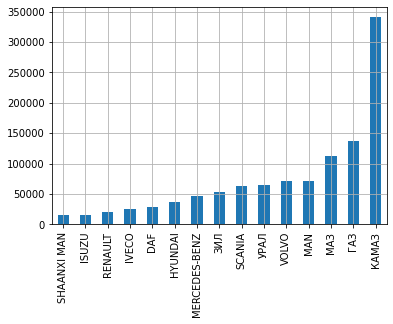

In [1341]:
tmp[tmp['operation_reason'] != 'первичная регистрация']['brand'].value_counts(normalize=False).head(15).sort_values().plot(kind = 'bar', grid=True)

In [806]:
#-> кто-то продал 324 машины в тч 17 машин вдв -> #финансбизнесгрупп -> вдв-транс 300 машин 20,21,24 - 04 - 2015

In [807]:
# потом вдв продает финансбизнесгрупп 182 машины 2015-05-   05-08 + 100 машин вдв продал мелкими партиями разным компаниям и физлицам

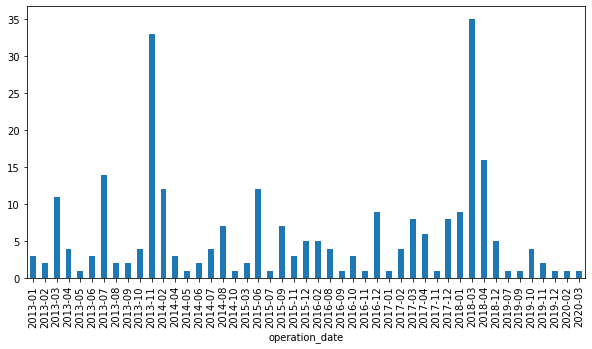

In [950]:
tmp['operation_date'].groupby(tmp['operation_date'].dropna().dt.to_period('M')).count().plot(kind='bar',figsize=(10,5),legend=None)

In [721]:
list_fbg_buy = tmp[tmp['inn_seller'] != '5032099538']['vin'].to_list()

In [738]:
len(list_fbg_buy)

324

In [737]:
list_vdv_buy = tmp[tmp['inn_seller'] == '7701653748']['vin'].to_list()

In [740]:
len(list_vdv_buy)

300

In [744]:
c = 0
for i in list_vdv_buy:
    if i in list_fbg_buy:
        c += 1
print(c*100/300)

94.33333333333333


In [1367]:
tmp = tmp[(tmp['inn_seller'] == '1648038937') | (tmp['inn_buyer'] == '1648038937')]

In [837]:
#tmp.shape

In [1099]:
tmp[tmp['brand'] == "КАМАЗ"]['model'].value_counts()

65115    51
43118    47
5350     36
43114    16
65117    12
65116     8
4308      7
4326      7
53229     4
55111     4
5320      3
53605     3
53215     3
65222     2
53228     2
43101     2
4208      2
65201     2
43253     2
5511      1
65221     1
65111     1
44108     1
53213     1
5410      1
53212     1
Name: model, dtype: int64

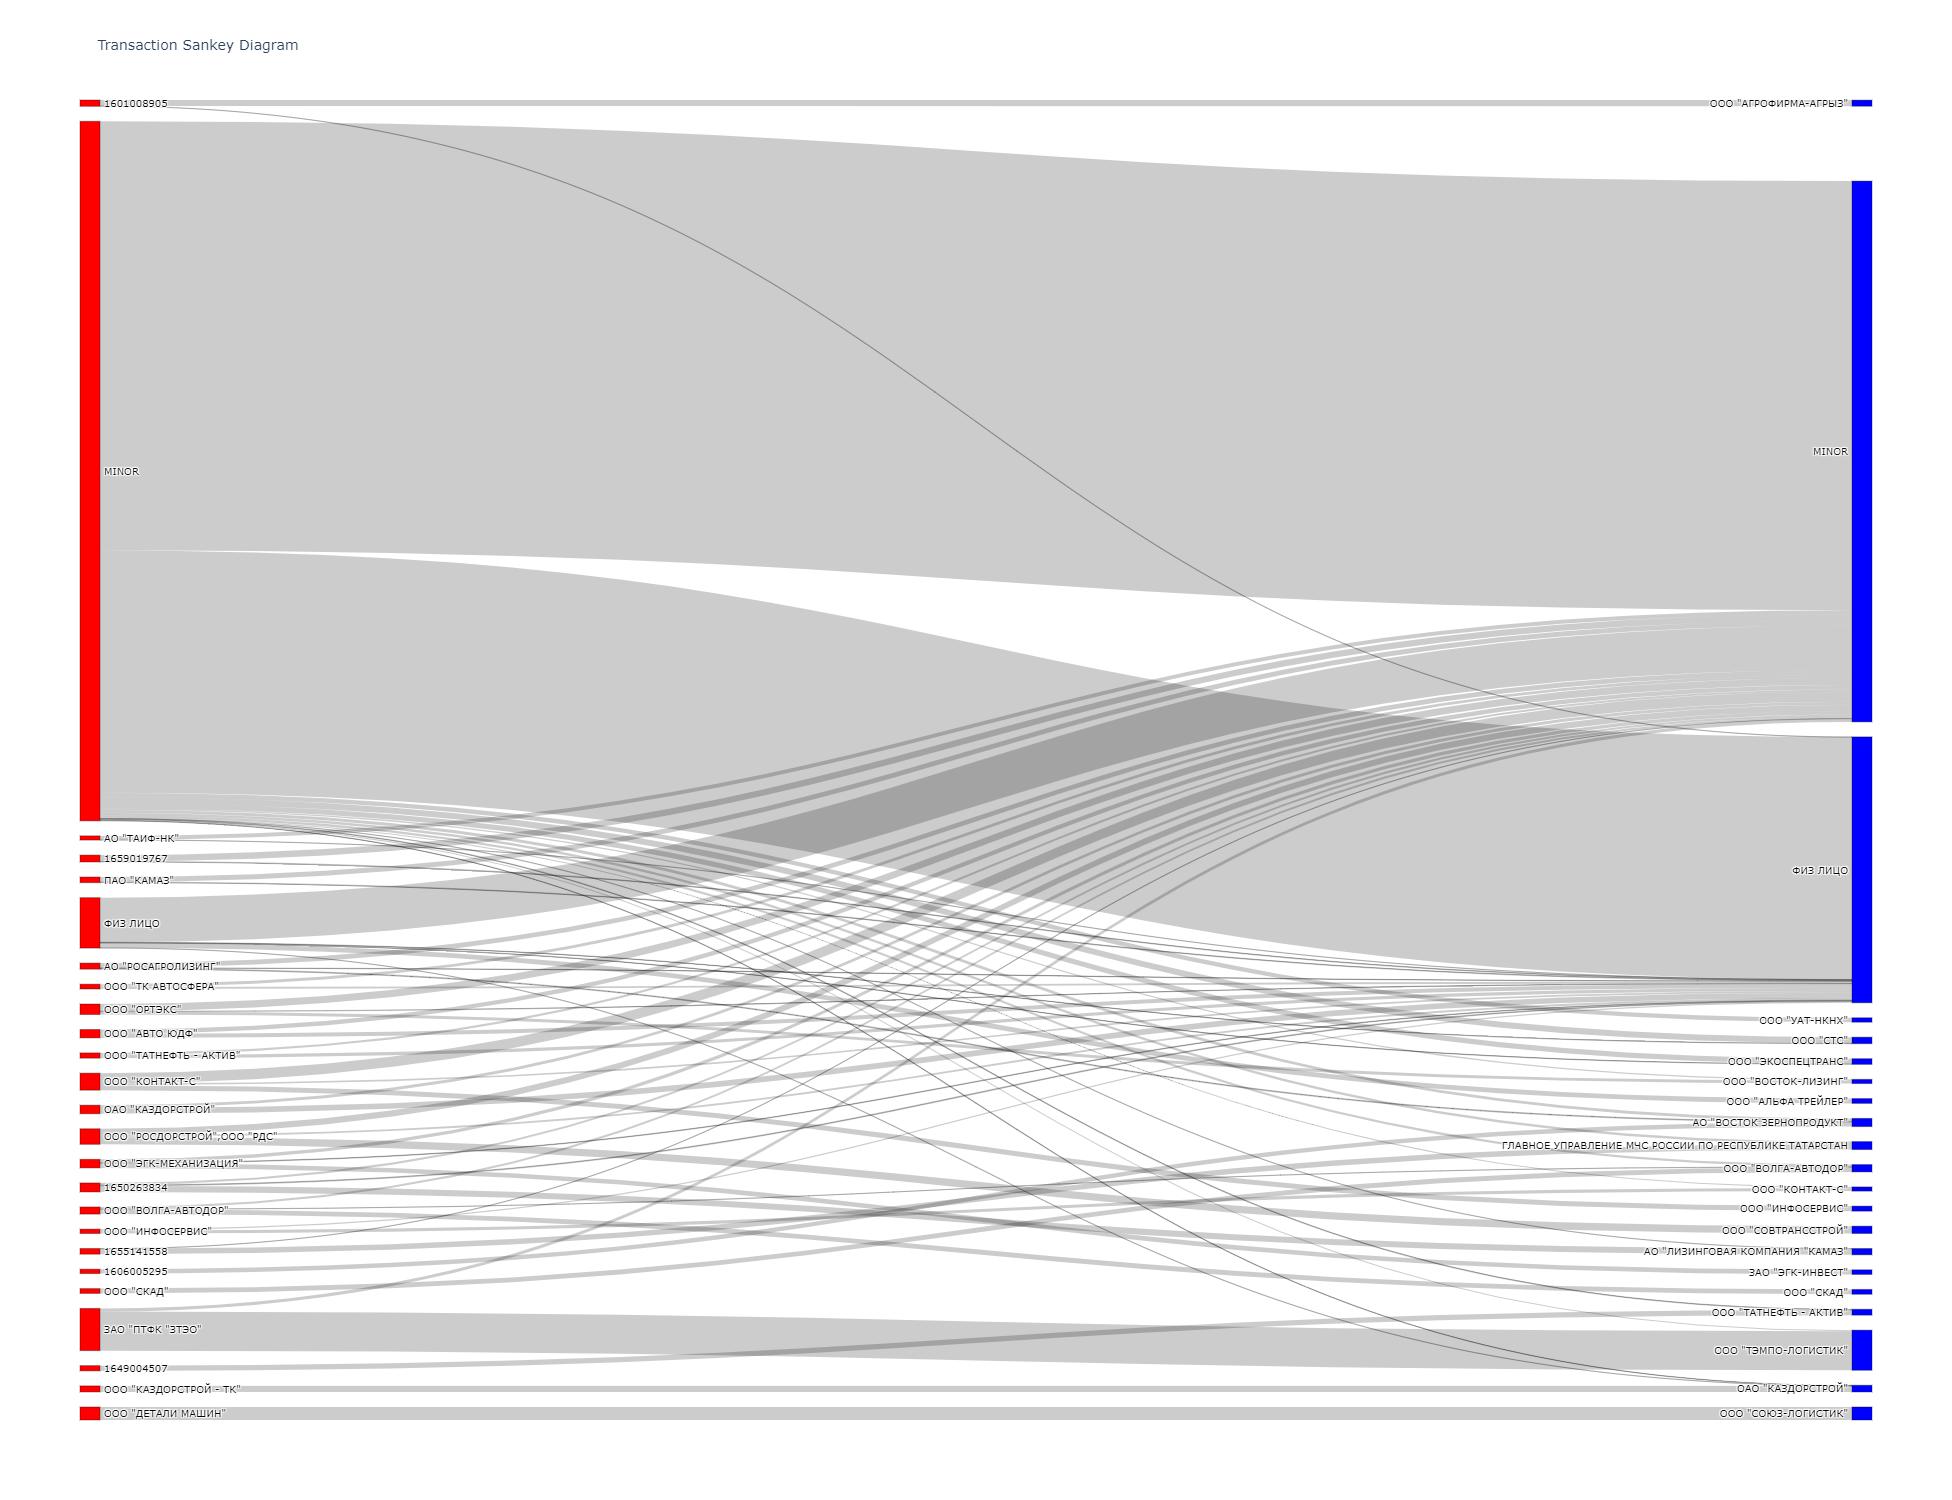

In [1395]:
sankey(
    tmp,
    seller=seller_group,
    buyer=buyer_group,
    bipartite=True,
    display_nan=True,
    display_minor=True,
    drop_cycle=False,
    min_transaction_seller=20,
    min_transaction_buyer=20,
)

In [ ]:
get_histogram(tmp, sec_feature='region_seller')
get_transacation_count(tmp, 'age', 'operation_year')

In [1183]:
tmp['brand'].value_counts()

КАМАЗ    20580
Name: brand, dtype: int64

In [953]:
tmp['operation_reason'].value_counts()

первичная регистрация                                                                                                    139
Изменение собственника по сделкам, произведенным в любой форме с сохранением государственных регистрационных знаков       58
регистрация, снятых с учета                                                                                               32
замена государственного регистрационного знака                                                                            12
выдача акта технического осмотра                                                                                           9
временная регистрация ТС (на срок проведения проверок, на срок временной прописки, регистрация испытательной техники)      4
выдача дубликата регистрационного документа                                                                                4
изменение Ф.И.О. (наименования) владельца                                                                                  3


In [952]:
tmp['inn_seller'].dropna()

42     7017150293
50     1650263834
51     1650263834
52     1650263834
53     1650263834
          ...    
259    7609020870
260    7609020870
261    3808228379
263    7602149875
265    7609020870
Name: inn_seller, Length: 63, dtype: object

# STASH